# Classify Video using Tensorflow

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib as tfcontrib
import numpy as np
%matplotlib inline

In [10]:
def show_image(img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
def show_gray_image(img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

In [11]:
frame = cv.imread('../images/video-x/frame24.jpg')

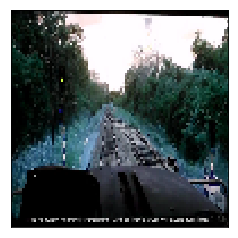

In [4]:
resized = cv.resize(frame, (96, 96))
show_image(resized)

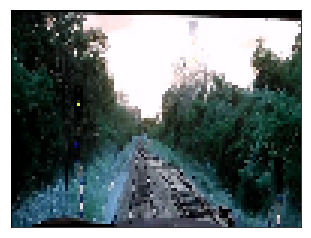

In [5]:

cropped = resized[0:72, 0:96]
show_image(cropped)

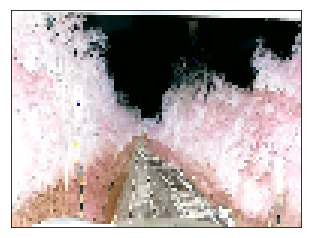

In [6]:
inverted1 = (255-cropped)
show_image(inverted1)

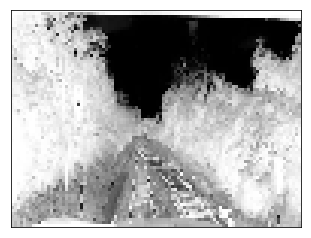

In [7]:
gray = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
show_gray_image(gray)

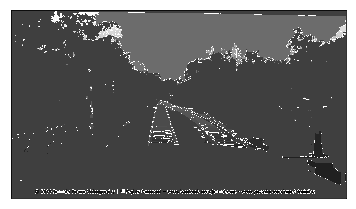

In [8]:
threshold = 100

gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)
ret, thresh = cv.threshold(tophat, threshold, 255, cv.THRESH_BINARY)

dist_transform = cv.distanceTransform(thresh, cv.DIST_L2, 5)
ret, markers = cv.connectedComponents(np.uint8(dist_transform))
watershed = cv.watershed(frame, markers)
show_gray_image(watershed)